In [93]:
#We are starting from scratch from the Lending Club data. .

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df_main = pd.read_csv('/Users/EagleFace/Documents/Loan_Data/LoanStats3a.csv', skiprows=1, low_memory=False)
df_main.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
df_target = df_main['loan_status'] == 'Fully Paid'
df_target = df_target.astype(int)
df_main['target'] = df_target

In [95]:
#Having set the target to loan status we can clean the data a bit
df_main = df_main.dropna(axis=1, how='all')
df_main = df_main.drop('id', axis=1)

In [96]:
#To further organize the data into categorical and numerical:
df_categorical = df_main.select_dtypes(include=['object'])
df_categorical.columns


Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [97]:
#Dropping problematic columns to avoid an error later
df_categorical = df_categorical.drop(['disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date','settlement_status','settlement_date'], axis=1)

In [98]:
#Dropping patently unnecessary columns
df_categorical = df_categorical.drop(['initial_list_status', 'hardship_flag', 'pymnt_plan', 'grade', 'application_type', 'next_pymnt_d', 'title', 'desc', 'zip_code', 'addr_state', 'emp_title'], axis=1)


In [99]:
df_categorical = df_categorical.drop(df_categorical.tail(1).index)
df_categorical = df_categorical.drop(df_categorical.tail(1).index)

In [100]:
df_categorical.int_rate = df_categorical.int_rate.str.rstrip('%').astype(float) / 100.0

In [101]:
df_categorical['term'] = df_categorical['term'] == ' 60months'
df_categorical['term'] = df_categorical['term'].astype(int)

In [102]:
home_ownership = pd.get_dummies(df_categorical['home_ownership'])
df_categorical = df_categorical.join(home_ownership)
df_categorical = df_categorical.drop('home_ownership', axis=1)

In [103]:
df_categorical['verification_status'] = df_categorical['verification_status'] == 'Verified'
df_categorical['verification_status'] = df_categorical['verification_status'].astype(int)

In [104]:
df_categorical.revol_util = df_categorical.revol_util.str.rstrip('%').astype(float) / 100.0

In [105]:
df_categorical['emp_length'] = df_categorical['emp_length'].fillna('n/a')
emp_length = pd.get_dummies(df_categorical['emp_length'])
df_categorical = df_categorical.join(emp_length)
df_categorical = df_categorical.drop('emp_length', axis=1)

In [106]:
purpose = pd.get_dummies(df_categorical['purpose'])
df_categorical = df_categorical.join(purpose)
df_categorical = df_categorical.drop('purpose', axis=1)

In [107]:
df_categorical['sub_grade'] = df_categorical['sub_grade'].astype('category', categories=[grade+str(subgrade) for grade in 'ABCDEFG' for subgrade in range(1, 6)], ordered=True)
df_categorical['sub_grade'] = df_categorical['sub_grade'].cat.codes

/Users/EagleFace/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [108]:
df_categorical = df_categorical.drop('n/a', axis=1)
df_categorical = df_categorical.drop('last_pymnt_d', axis=1)
df_categorical = df_categorical.drop('earliest_cr_line', axis=1)
df_categorical = df_categorical.drop('issue_d', axis=1)
df_categorical = df_categorical.drop('last_credit_pull_d', axis=1)

In [109]:
loan_status = pd.get_dummies(df_categorical['loan_status'])
df_categorical = df_categorical.join(loan_status)
df_categorical = df_categorical.drop('loan_status', axis=1)
df_categorical = df_categorical.drop('Does not meet the credit policy. Status:Charged Off', axis=1)
df_categorical = df_categorical.drop('Does not meet the credit policy. Status:Fully Paid', axis=1)
df_categorical.head()

,term,int_rate,sub_grade,verification_status,revol_util,MORTGAGE,NONE,OTHER,OWN,RENT,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Fully Paid
0,0,0.1065,6,1,0.837,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0.1527,13,0,0.094,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0.1596,14,0,0.985,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0,0.1349,10,0,0.210,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.1269,9,0,0.539,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [110]:
#Running a query for deviation from zero 

df_numerical = df_main.select_dtypes(include=['int', 'float64'])
df_numerical.std() == 0.0

loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
installment                   False
annual_inc                    False
dti                           False
delinq_2yrs                   False
inq_last_6mths                False
mths_since_last_delinq        False
mths_since_last_record        False
open_acc                      False
pub_rec                       False
revol_bal                     False
total_acc                     False
out_prncp                      True
out_prncp_inv                  True
total_pymnt                   False
total_pymnt_inv               False
total_rec_prncp               False
total_rec_int                 False
total_rec_late_fee            False
recoveries                    False
collection_recovery_fee       False
last_pymnt_amnt               False
collections_12_mths_ex_med     True
policy_code                    True
acc_now_delinq                False
chargeoff_within_12_mths    

In [111]:
df_numerical = df_numerical.drop(['out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'chargeoff_within_12_mths'], axis=1)

In [112]:
df_numerical['mths_since_last_delinq'] = df_numerical['mths_since_last_delinq'].fillna(120.0)
df_numerical['mths_since_last_record'] = df_numerical['mths_since_last_record'].fillna(129.0)

df_numerical['delinq_2yrs'] = df_numerical['delinq_2yrs'].fillna(0.0)
df_numerical = df_numerical.drop('tax_liens', axis=1)
df_numerical['funded_amnt'] = df_numerical['funded_amnt'].fillna(0.0)
df_numerical['loan_amnt'] = df_numerical['loan_amnt'].fillna(0.0)
df_numerical = df_numerical.fillna(0.0)

df_train = df_numerical.join(df_categorical)
df_train = df_train.drop(df_train.loc[df_train['int_rate'].isnull()].index)
df_train = df_train.dropna(axis=0)
df_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,Charged Off,Fully Paid
0,5000.0,5000.0,4975.0,162.87,24000.0,27.65,0.0,1.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2500.0,2500.0,2500.0,59.83,30000.0,1.00,0.0,5.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2400.0,2400.0,2400.0,84.33,12252.0,8.72,0.0,2.0,120.0,129.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,10000.0,10000.0,10000.0,339.31,49200.0,20.00,0.0,1.0,35.0,129.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3000.0,3000.0,3000.0,67.79,80000.0,17.94,0.0,0.0,38.0,129.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


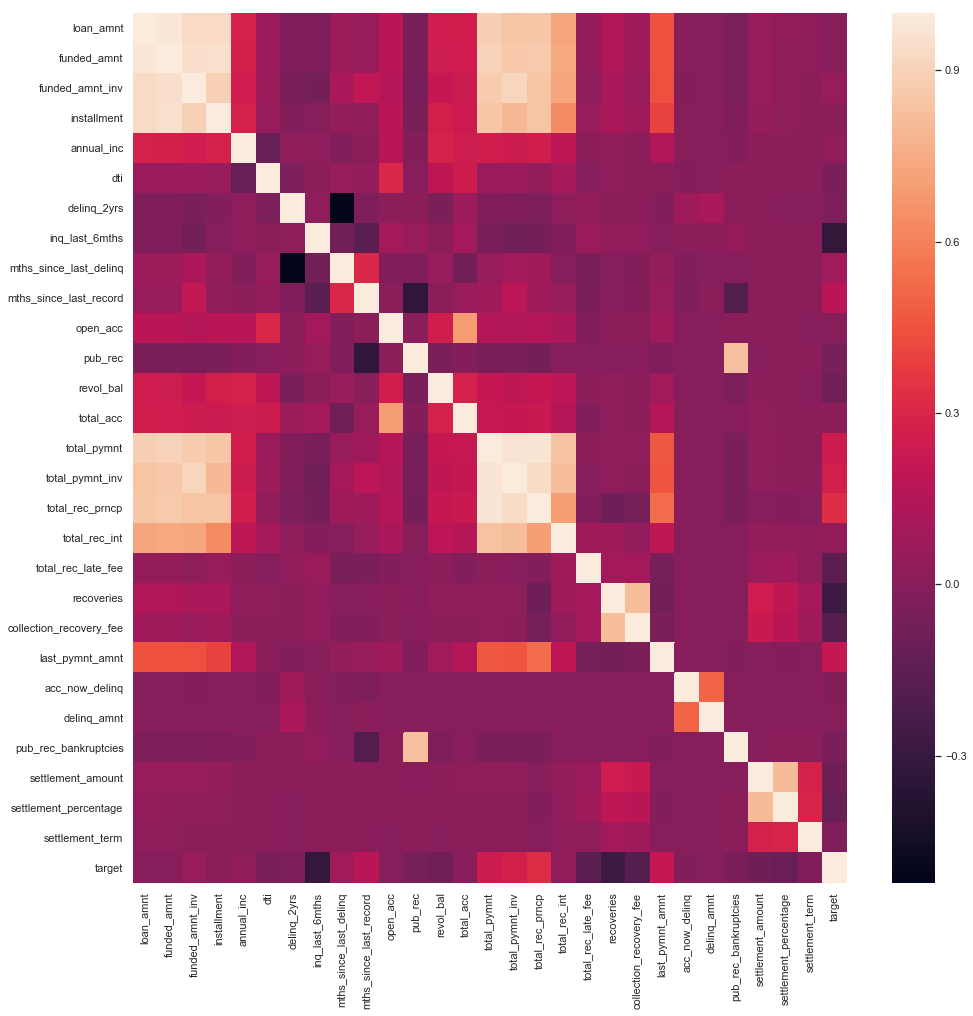

In [113]:
#Correlation Matrix heatmap for numerical factors
corr = df_numerical.corr()

plt.figure(figsize=(16,16))
sns.heatmap(corr)

The above correlation matrix provides an excellent jumping-off point for building graphs. 

Correlations to explore graphically:
- settlement amount vs settlement percentage
- acc_now_delinq vs delinq_amount 
- recoveries vs collection_recovery_fee
- pub_rec vs pub_rec_bankruptcies
- total_rec_int vs total_paymnt
- total_rec_int vs total_paymnt_inv
- total_rec_int vs total_rec_prncp
- total_rec_prncp vs total_paymnt
- total_rec_prncp vs total_paymnt_inv
- total_payment_inv vs total_paymnt
- total_paymnt vs loan_amnt
- funded_amnt vs total_rec_int
- (negative correlation:)mths)since_last_delinq vs delinq_2yrd
- 

Other graphs (i.e. categorical)
- home ownership pie chart
- emp length pie chart
- term pie chart 

In [114]:
list(df_numerical)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'acc_now_delinq',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term',
 'target']

In [115]:
#Data Dictionary for reference: 
data_dict = pd.read_excel("/Users/EagleFace/Documents/Loan_Data/LCDataDictionary.xlsx")
data_dict.iloc[[85]]

,LoanStatNew,Description
85,pub_rec,Number of derogatory public records


In [116]:
#Settlement amount vs settlement percentage
y1 = df_main['settlement_amount']
x1 = df_main['settlement_percentage']

In [117]:
#briefly sampling the data here we see many NaNs
x1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: settlement_percentage, dtype: float64

In [118]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: settlement_amount, dtype: float64

In [119]:
x1.fillna(0, inplace = True)
y1.fillna(0, inplace = True)

In [120]:
x1.unique()

array([  0.  ,  33.1 ,  33.  ,  92.74,  44.99,  50.  ,  61.12,  40.  ,
        30.  ,  65.  ,  29.83,  62.97,  49.48,  41.78,  45.  ,  47.  ,
        39.99,  41.25,  41.02,  29.13,  58.87,  76.61,  66.75,  49.99,
        36.91,  42.06,  50.33,  52.17,  33.62,  67.31,  28.56,  51.54,
        19.46,  53.9 ,  50.58,  69.32,  49.96,  33.63,  52.76,  46.34,
        31.54,  47.1 ,  80.  ,  22.04,  59.64,  55.  ,  47.2 ,  20.  ,
        35.  ,  40.96,  49.98,  47.52,  41.92,  35.11,  45.02,  37.98,
        49.94,  42.99,  41.21,  62.34,  60.  ,  30.08,  70.28,  42.37,
        39.98,  44.13,  41.43,  50.32,  40.24,  61.72,  62.2 ,  75.76,
        37.9 ,  67.55,  76.48,  52.03,  57.05,  28.94,  32.7 ,  73.39,
        75.  ,  53.89,  62.67,  90.02,  32.77,  40.59,  64.96,  60.64,
        73.28,  52.69,  54.37,  43.13,  27.14,  51.45,  10.69,  57.83,
        91.7 ,  38.47,  71.  ,  60.69,  60.73,  86.41,  43.56,  70.37,
        33.05,  50.15,  37.5 ,  46.64,  87.25,  36.07,  66.31,  69.  ,
      

In [121]:
y1.unique()

array([     0.  ,   3852.29,   3171.48,   4390.  ,   6515.  ,   6576.31,
        10000.  ,   5025.  ,   5419.28,    697.92,   5036.38,   3498.7 ,
        13066.15,   8576.69,  14161.28,    694.48,   4248.84,   5591.  ,
         4580.  ,   2905.  ,   1400.  ,   6069.  ,   2500.  ,   1236.33,
         3824.  ,   8300.  ,   6003.  ,   9000.  ,   8000.  ,   1142.  ,
         3432.5 ,   5684.8 ,   2100.  ,   2587.  ,   5378.  ,   5500.  ,
         1500.  ,   5084.03,   5000.  ,   4438.  ,   3600.  ,   2287.78,
         1736.16,   6500.  ,   4152.  ,   7274.8 ,   3465.  ,   1800.  ,
         2750.  ,   1091.2 ,   4500.  ,   3711.12,   6123.85,   2000.  ,
        11000.  ,   5114.  ,   4425.  ,   1447.19,   1391.63,   3584.  ,
         7420.48,   3300.  ,   5302.19,   1134.  ,   1760.2 ,   2547.88,
          500.  ,   3201.  ,   2851.48,   2200.  ,   4058.4 ,   8184.05,
         1422.11,   8600.  ,   5750.  ,  10412.  ,   8269.  ,   4486.91,
          295.8 ,    793.  ,   5095.  ,   2802.24, 

In [154]:
#Graph 1
_1 = sns.regplot(x=x1, y=y1)
_1.set_title('Settlement % vs Settlement $$')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x112ff6378> (for post_execute):


ValueError: 
Settlement % vs Settlement $$
                           ^
Expected end of text (at char 27), (line:1, col:28)

ValueError: 
Settlement % vs Settlement $$
                           ^
Expected end of text (at char 27), (line:1, col:28)

In [123]:
#Graph 2: acc_now_delinq vs delinq_amount
x2 = df_main['acc_now_delinq']
y2 = df_main['delinq_amnt']
x2.fillna(0, inplace = True)
y2.fillna(0, inplace = True)

In [124]:
x2.unique()

array([ 0.,  1.])

In [125]:
y2.unique()

array([    0.,    27.,  6053.])

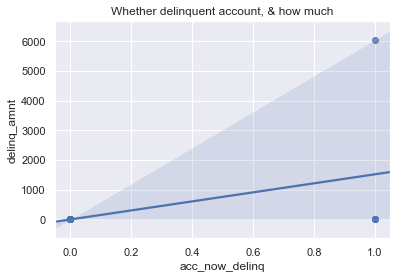

In [126]:
#Limited data for this graph but let's try it anyway
_2 = sns.regplot(x=x2, y=y2)
_2.set_title('Whether delinquent account, & how much')

In [127]:
#Graph3: recoveries vs collection_recovery_fee
x3 = df_main['recoveries']
y3 = df_main['collection_recovery_fee']

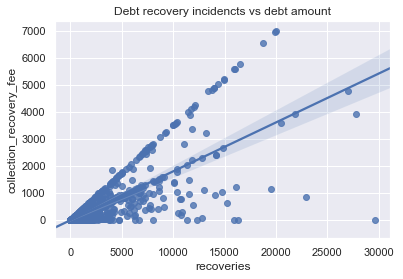

In [128]:
_3 = sns.regplot(x=x3, y=y3)
_3.set_title('Debt recovery incidencts vs debt amount')

In [129]:
#Graph 4: pub_rec vs pub_rec_bankruptcies
x4 = df_main['pub_rec']
y4 = df_main['pub_rec_bankruptcies']

x4.fillna(0, inplace=True)
y4.fillna(0, inplace=True)

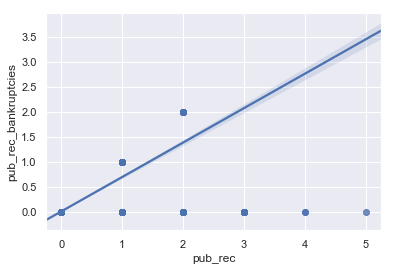

In [130]:
#Pub_rec is number of public derogatory records, and
#pub_rec_bankruptcies is the number of public record bankruptcies
_4 = sns.regplot(x=x4, y=y4)
_4.set_title('Delinquent records vs Bankruptcies')

In [134]:
#Graph 5: total_rec_int vs total_paymnt
x5 = df_main['total_rec_int']
y5 = df_main['total_pymnt']

y5.unique()

array([ 5863.1551867 ,  1014.53      ,  3005.66684414, ...,  2904.49882892,
        7373.9049617 ,  5619.76209047])

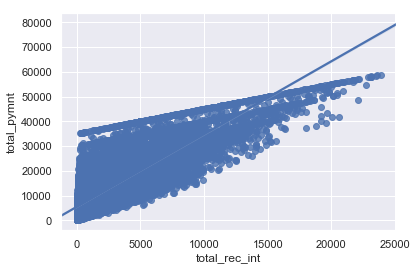

In [135]:
#Since x5 and y5 neither have NaNs, we can easily try a graph. 
_5 = sns.regplot(x=x5, y=y5)
_5.set_title('Interest Payments vs Total Payments')

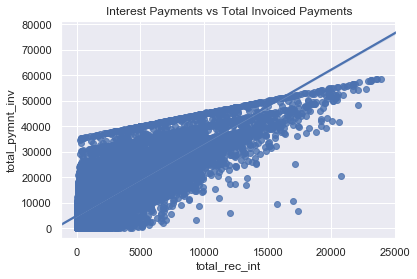

In [138]:
#Graph 6: total_rec_int vs total_pymnt_inv

x6 = df_main['total_rec_int']
y6 = df_main['total_pymnt_inv']

_6 = sns.regplot(x=x6, y=y6)
_6.set_title('Interest Payments vs Total Invoiced Payments')

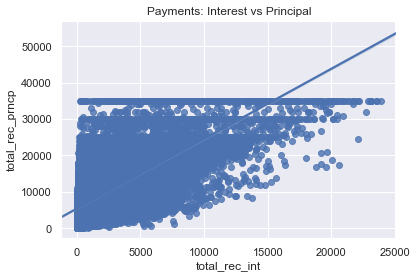

In [143]:
#Graph 7: total_rec_int vs total_rec_prncp
x7 = df_main['total_rec_int']
y7 = df_main['total_rec_prncp']

_7 = sns.regplot(x=x7, y=y7)
_7.set_title('Payments: Interest vs Principal')


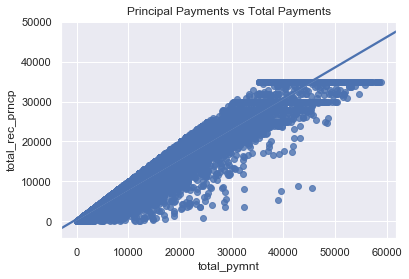

In [145]:
#Graph 8: total_rec_prncp vs total_payment
x8 = df_main['total_pymnt']
y8 = df_main['total_rec_prncp']

_8 = sns.regplot(x=x8, y=y8)
_8.set_title('Principal Payments vs Total Payments')

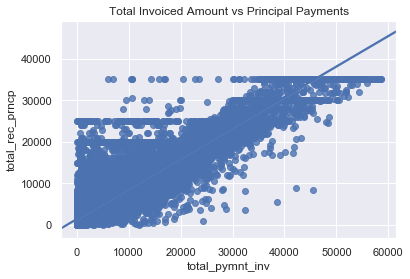

In [147]:
#Graph 9: total_paymnt_inv vs total_rec_prncp
x9 = df_main['total_pymnt_inv']
y9 = df_main['total_rec_prncp']

_9 = sns.regplot(x=x9, y=y9)
_9.set_title('Total Invoiced Amount vs Principal Payments')

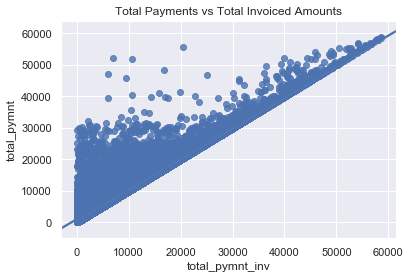

In [148]:
#Graph 10: total_pymnt_inv vs total_pymnt; makes sense why this is 
#a high correlation. The sharpness of this graph is due to the nature
#of some clients paying less than the invoiced amount (defaulting), but 
#no client pays *more* than the invoiced amount. 
x10 = df_main['total_pymnt_inv']
y10 = df_main['total_pymnt']

_10 = sns.regplot(x=x10, y=y10)
_10.set_title('Total Payments vs Total Invoiced Amounts')

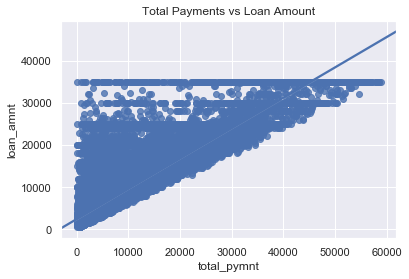

In [149]:
#Graph 11: total_pymnt vs loan_amnt
x11 = df_main['total_pymnt']
y11 = df_main['loan_amnt']

_11 = sns.regplot(x=x11, y=y11)
_11.set_title('Total Payments vs Loan Amount')

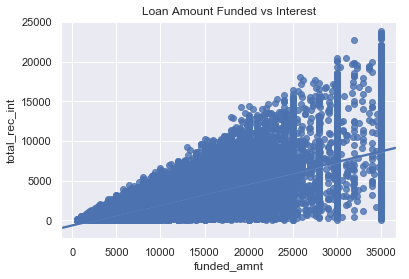

In [150]:
#Graph 12: funded_amnt vs total_rec_int
x12 = df_main['funded_amnt']
y12 = df_main['total_rec_int']

_12 = sns.regplot(x=x12, y=y12)
_12.set_title('Loan Amount Funded vs Interest')

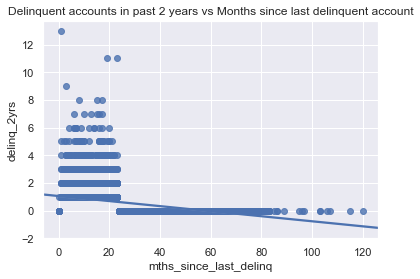

In [152]:
#Graph 13: months since last delinquent account (mthsSinceLastDelinq) vs 
#delinquencies in past 2 years (delinq2Yrs)
#For this we expect a negative correlation. 
x13 = df_main['mths_since_last_delinq']
y13 = df_main['delinq_2yrs']

_13 = sns.regplot(x=x13, y=y13)
_13.set_title('Delinquent accounts in past 2 years vs Months since last delinquent account')


In [155]:
#Graph 14: Categorical variable graphs, bar chart or pie chart? 
list(df_categorical)

['term',
 'int_rate',
 'sub_grade',
 'verification_status',
 'revol_util',
 'MORTGAGE',
 'NONE',
 'OTHER',
 'OWN',
 'RENT',
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding',
 'Charged Off',
 'Fully Paid']

In [157]:
list(df_main)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag',
 '